In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
cars_data = pd.read_csv('UsedCars.csv',index_col=0, na_values=["??", "????"])
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [7]:
cars_data.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [8]:
cars_data['Age'].fillna(cars_data['Age'].median(), inplace=True)
cars_data['KM'].fillna(cars_data['KM'].median(), inplace=True)
cars_data['HP'].fillna(cars_data['HP'].median(), inplace=True)

In [9]:
cars_data.isnull().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [10]:
cars_data['FuelType'].fillna(cars_data['FuelType'].mode()[0], inplace=True)
cars_data['MetColor'].fillna(cars_data['MetColor'].mode()[0], inplace=True)

In [11]:
cars_data['Doors'].replace('three','3', inplace=True)
cars_data['Doors'].replace('four','4', inplace=True)
cars_data['Doors'].replace('five','5', inplace=True)

In [12]:
cars_data['Doors']=cars_data['Doors'].astype(int)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int32  
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 117.8+ KB


In [13]:
cars1 =pd.get_dummies(cars_data,drop_first=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [15]:
#Save numerical columns in a list
cnames = ["Price", "Age", "KM", "HP", "CC", "Weight"]
sc = MinMaxScaler()
for col in cnames:
    cars1[col] = sc.fit_transform(cars1[col].values.reshape(-1,1))

cars1.head(5)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,0.325044,0.278481,0.193355,0.170732,1.0,0,1.0,3,0.268293,1,0
1,0.333925,0.278481,0.300149,0.170732,1.0,0,1.0,3,0.268293,1,0
2,0.341030,0.291139,0.171647,0.170732,1.0,0,1.0,3,0.268293,1,0
3,0.376554,0.316456,0.197528,0.170732,0.0,0,1.0,3,0.268293,1,0
4,0.333925,0.367089,0.158433,0.170732,0.0,0,1.0,3,0.276423,1,0


# Linear Regression
- Consider Age of the car as an indepedent variable and Price as dependent variable.
- We will build a simple linear regression model using these two variables

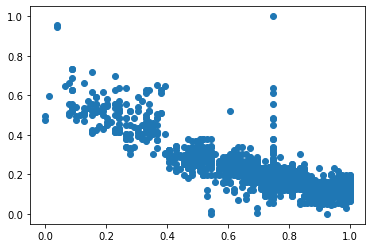

In [16]:
plt.scatter(cars1['Age'],cars1['Price'])
plt.show()

In [17]:
import statsmodels.api as sma

In [18]:
x=cars1['Age']
y= cars1['Price']
x = sma.add_constant(x)
x.head()

,const,Age
0,1.0,0.278481
1,1.0,0.278481
2,1.0,0.291139
3,1.0,0.316456
4,1.0,0.367089


In [19]:
model = sma.OLS(y, x)  #Ordinary Least Square method
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     3573.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:14:15   Log-Likelihood:                 1803.2
No. Observations:                1436   AIC:                            -3602.
Df Residuals:                    1434   BIC:                            -3592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5597      0.006     95.483      0.000       0.548       0.571
Age           -0.4786      0.008    -59.771      0.000      -0.494      -0.463
==============================================================================
Omnibus:                      793.789   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19100.825
Skew:                           2.075   Prob(JB):                         0.00
Kurtosis:                      20.379   Cond. No.                         6.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Price')

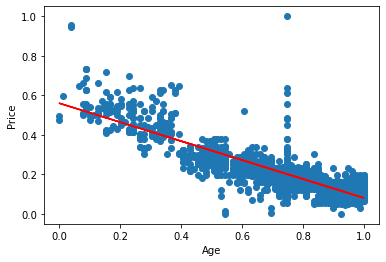

In [20]:
x=cars1['Age']
y= cars1['Price']
plt.scatter(x,y)
y_pred = model.predict()
plt.plot(x,y_pred, c='red')
plt.xlabel('Age')
plt.ylabel('Price')

***NOTE:*** 
1. *OLS() Model*:
    - one can give dependent and independent variables directly as parameters.
    - The constant value (intercept) has to be explicitly added to independent variables
    

### Explanation of the output:

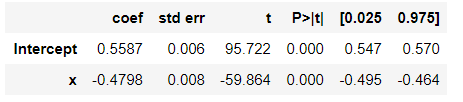

- ***coef:*** The value of intercept and coefficients for each independent variable is shown here.
- ***std err:*** Standard error of the model with respect to intercept and independent variables
- ***t:*** The value of t-statistics
- ***P>|t|*** This is p-value. This indicates whether the null hypothesis (that Age and Price are independent) is accepted or not. p value greater than 0.05 means the Ho is accepted at 95% confidence level. p-value near to 0 means the target variable is influenced by the independent variable.
- ***[0.025	0.975]*** This is the confidence interval. The value of coefficient falling between these two values indicates there is dependency between the variables. 

- ***R-squared:*** The percentage of variation in dependent variable is explained by the independent variables. In this example, 71.4% of variability in Price is explained by Age.
- ***Adj. R-squared:*** This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.
- ***F-statistic:*** Value of F-Statistic
- ***Prob (F-statistic):*** This tells the overall significance of the regression. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is zero. This implies that overall the regressions is meaningful.

### Visualization of Actual v/s Predicted Values

### Build a model with another independent variable


In [22]:
x=cars1.drop('Price', axis=1)
y= cars1['Price']

#bias term needs to coded separately
x = sma.add_constant(x)
x.head()


,const,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,1.0,0.278481,0.193355,0.170732,1.0,0,1.0,3,0.268293,1,0
1,1.0,0.278481,0.300149,0.170732,1.0,0,1.0,3,0.268293,1,0
2,1.0,0.291139,0.171647,0.170732,1.0,0,1.0,3,0.268293,1,0
3,1.0,0.316456,0.197528,0.170732,0.0,0,1.0,3,0.268293,1,0
4,1.0,0.367089,0.158433,0.170732,0.0,0,1.0,3,0.276423,1,0


### $R^2$ and Adjusted $R^2$
- The value of $R^2$ may increase or remain constant as we keep adding additional independent variables to the model.
- The value of Adjusted $R^2$ may increase or decreases as number of independent variables increases.
    - Treats $R^2$ as Penalization factor for a bad variable and rewarding factor for a good or significant variable. 
- Adjusted $R^2$ is thus a better model evaluator and can correlate the variables more efficiently than $R^2$.

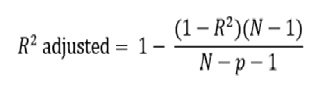

$R^2$ = value of $R^2$ 

p = Number of predictors (independent variables)

N = total sample size


#### Build a model with all indepedent variables

In [2]:


#bias term needs to coded separately


In [23]:
model = sma.OLS(y, x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     744.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:16:00   Log-Likelihood:                 2218.2
No. Observations:                1436   AIC:                            -4414.
Df Residuals:                    1425   BIC:                            -4356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3943      0.017     23.035      0.000       0.361       0.428
Age                -0.3253      0.008    -40.110      0.000      -0.341      -0.309
KM                 -0.1647      0.012    -13.235      0.000      -0.189      -0.140
HP                  0.1161      0.021      5.551      0.000       0.075       0.157
MetColor            0.0038      0.003      1.245      0.213      -0.002       0.010
Automatic           0.0017      0.006      0.274      0.784      -0.010       0.014
CC                 -0.0337      0.012     -2.855      0.004      -0.057      -0.011
Doors              -0.0038      0.002     -2.476      0.013      -0.007      -0.001
Weight              0.5838      0.026     22.259      0.000       0.532       0.635
FuelType_Diesel     0.0160      0.018      0.900      0.368      -0.019       0.051
FuelType_Petrol     0.0334      0.014      2.408      0.016       0.006       0.061
==============================================================================
Omnibus:                      359.365   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10117.631
Skew:                          -0.522   Prob(JB):                         0.00
Kurtosis:                      15.962   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x=cars1.drop(['Price','MetColor','Automatic','FuelType_Diesel'], axis=1)
x = sma.add_constant(x)
x.head()

,const,Age,KM,HP,CC,Doors,Weight,FuelType_Petrol
0,1.0,0.278481,0.193355,0.170732,1.0,3,0.268293,0
1,1.0,0.278481,0.300149,0.170732,1.0,3,0.268293,0
2,1.0,0.291139,0.171647,0.170732,1.0,3,0.268293,0
3,1.0,0.316456,0.197528,0.170732,1.0,3,0.268293,0
4,1.0,0.367089,0.158433,0.170732,1.0,3,0.276423,0


In [25]:
model = sma.OLS(y, x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1063.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:16:34   Log-Likelihood:                 2217.0
No. Observations:                1436   AIC:                            -4418.
Df Residuals:                    1428   BIC:                            -4376.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4079      0.012     34.824      0.000       0.385       0.431
Age                -0.3255      0.008    -40.488      0.000      -0.341      -0.310
KM                 -0.1668      0.012    -13.504      0.000      -0.191      -0.143
HP                  0.1056      0.017      6.139      0.000       0.072       0.139
CC                 -0.0278      0.010     -2.789      0.005      -0.047      -0.008
Doors              -0.0039      0.002     -2.536      0.011      -0.007      -0.001
Weight              0.5862      0.026     22.859      0.000       0.536       0.637
FuelType_Petrol     0.0244      0.009      2.570      0.010       0.006       0.043
==============================================================================
Omnibus:                      365.198   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10045.963
Skew:                          -0.553   Prob(JB):                         0.00
Kurtosis:                      15.910   Cond. No.                         86.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dividing data into train and test 

In [26]:
from sklearn.model_selection import train_test_split

In [48]:
x=cars1.drop('Price', axis=1)
y= cars1['Price']

In [28]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.20)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 8)
(288, 8)
(1148,)
(288,)


In [30]:
#bias term needs to coded separately
x_train = sma.add_constant(x_train)
x_test = sma.add_constant(x_test)
x_train.head()


,const,Age,KM,HP,CC,Doors,Weight,FuelType_Petrol
1123,1.0,0.949367,0.456380,0.333333,0.428571,5,0.138211,1
33,1.0,0.746835,0.134531,0.227642,0.142857,3,0.162602,1
619,1.0,0.810127,0.576821,0.024390,1.000000,3,0.186992,0
1177,1.0,0.987342,0.383084,0.138211,0.000000,5,0.056911,1
977,1.0,0.746835,0.189297,0.138211,0.000000,5,0.056911,1


In [31]:
model = sma.OLS(y_train, x_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     803.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:17:54   Log-Likelihood:                 1751.2
No. Observations:                1148   AIC:                            -3486.
Df Residuals:                    1140   BIC:                            -3446.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4048      0.013     30.584      0.000       0.379       0.431
Age                -0.3202      0.009    -35.125      0.000      -0.338      -0.302
KM                 -0.1777      0.014    -12.341      0.000      -0.206      -0.149
HP                  0.1104      0.019      5.949      0.000       0.074       0.147
CC                 -0.0198      0.011     -1.787      0.074      -0.042       0.002
Doors              -0.0030      0.002     -1.728      0.084      -0.006       0.000
Weight              0.5497      0.028     19.372      0.000       0.494       0.605
FuelType_Petrol     0.0233      0.011      2.217      0.027       0.003       0.044
==============================================================================
Omnibus:                      279.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7474.905
Skew:                          -0.481   Prob(JB):                         0.00
Kurtosis:                      15.464   Cond. No.                         83.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
y_pred = model.predict(x_test)
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
489,0.198579,0.283201
1182,0.197158,0.144884
1382,0.056838,0.177142
37,0.376554,0.434295
598,0.216696,0.262273
...,...,...
330,0.236234,0.322153
984,0.181172,0.191475
1076,0.056838,0.060890
1435,0.092362,0.239283


In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

RMSE= 0.04805309988136968


In [35]:
r2=r2_score(y_test,y_pred)
print('Regressor Score is  = ',r2)

Regressor Score is  =  0.8657973371368712


### Removing insignificant Variables

In [39]:
x=cars1.drop(['Price','MetColor','Automatic','CC', 'Doors','FuelType_Petrol' ], axis=1)
y= cars1['Price']

In [40]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.20)
x_train = sma.add_constant(x_train)
x_test = sma.add_constant(x_test)

In [41]:
model = sma.OLS(y_train, x_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1113.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:20:49   Log-Likelihood:                 1737.8
No. Observations:                1148   AIC:                            -3464.
Df Residuals:                    1142   BIC:                            -3433.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4257      0.008     51.778      0.000       0.410       0.442
Age                -0.3309      0.009    -36.403      0.000      -0.349      -0.313
KM                 -0.1788      0.013    -13.275      0.000      -0.205      -0.152
HP                  0.0929      0.017      5.448      0.000       0.059       0.126
Weight              0.5056      0.026     19.598      0.000       0.455       0.556
FuelType_Diesel    -0.0268      0.009     -3.108      0.002      -0.044      -0.010
==============================================================================
Omnibus:                      226.245   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4753.176
Skew:                          -0.282   Prob(JB):                         0.00
Kurtosis:                      12.952   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:

y_pred = model.predict(x_test)

In [43]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
r2=r2_score(y_test,y_pred)
print('Regressor Score is  = ',r2)

RMSE= 0.04709800662296585
Regressor Score is  =  0.8639481534145488


## OLS/Regression Assumptions
1. ***Linear relationship:*** There exists a linear relationship between the independent variable X and the dependent variable Y.
    - Draw a scatter plot of X and Y. Visually, you can observe the linearity.
    - During multivariate regression, if you cannot plot a scatter plot (of 2 dimensions), take a help of residual plot. 
        - The residual plot has all the points scattered, then linear regression is the correct model. That means, there is a linearity between independent and dependent variables.
        - If the residual plot has some parabolic shape means there is a non-linear (ex. quadratic) relationship between independent and dependent variables. In such a situations, Linear Regression is not a good model.
    - If you find non-linearity, you can try below given options:
        - Apply a nonlinear transformation to the independent and/or dependent variable. Common examples include taking the log, the square root, or the reciprocal of the independent and/or dependent variable.
        - Add another independent variable to the model. For example, if the plot of x vs. y has a parabolic shape then it might make sense to add $X^2$ as an additional independent variable in the model.


2. ***Independence:*** The residuals are independent. In particular, there is no correlation between consecutive residuals.
    - Observe the residual plot (code is given below)


3. ***Homoscedasticity:*** The residuals have constant variance at every level of x.
    - When this is not the case, the residuals are said to suffer from heteroscedasticity.
    - The funnel shaped graph.
    - Possible Remedies:
        - Transform the dependent variable.
        - Use weighted regression
        
 
4. ***Normality:*** The residuals of the model are normally distributed.
    - Check the assumption visually using Q-Q plots.

#### Funnel-shaped graph representing heteroscadasticity

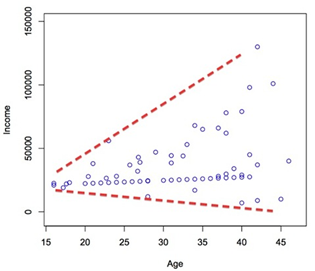

### Residual Plot

Text(0.5, 1.0, 'Residual plot')

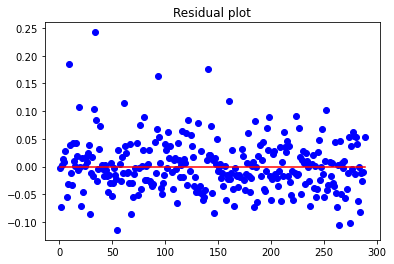

In [44]:
residue=y_test-y_pred
x=[i for i in range(1,len(residue)+1)]
x_plot = plt.scatter(x,residue, c='b')
plt.plot(x,[0]*len(residue),c='r')
plt.title('Residual plot')

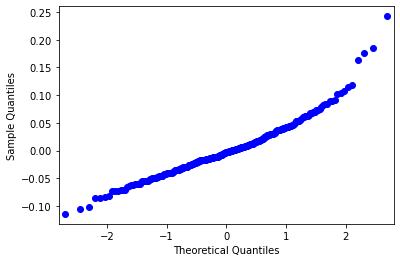

In [45]:
sma.qqplot(residue);

In [48]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
print(lr.coef_)

[ 0.         -0.33088359 -0.17884284  0.0929456   0.50557143 -0.02675026]


In [54]:
print(lr.intercept_)

0.4257493983803339


In [55]:
ypred = lr.predict(x_test)

In [56]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
r2=r2_score(y_test,y_pred)
print('Regressor Score is  = ',r2)

RMSE= 0.04709800662296585
Regressor Score is  =  0.8639481534145488


In [ ]:
#Using sklearn

## Bias, Variance, Underfitting, Overfitting
- ***Underfitting:*** The model is not fitting the data correctly. Fails to predict both training and testing data.
    - The model's performance will be bad on both training and testing data
    - Underfitting may happen due to over simplification of the mdoel
- ***Overfitting:*** The model performs very well on training data, but fails to predict testing data properly.
    - Reasons:
        - Check train-test test split size. Do not keep too much % of data in training (limit to 80%-85%. But, if u give 90-95% data in training set, there will be overfit, because the model will memorize the data, instead of learning the patterns from the data)
        - Try to increase the size of your dataset. Normally overfitting will happen when the whole dataset size is small.
- ***Bias*** is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.
- ***Variance*** is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.